# Import Libraries

In [1]:
import torch, torchvision
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
import copy

In [3]:
#setting number batch for train and valid data
numb_batch = 64

# Getting Data

In [4]:
 T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
train_data = torchvision.datasets.MNIST('data', train=True, download=True, transform=T)
val_data = torchvision.datasets.MNIST('data', train=False, download=True, transform=T)

train_dl = torch.utils.data.DataLoader(train_data, batch_size = numb_batch)
val_dl = torch.utils.data.DataLoader(val_data, batch_size = numb_batch)

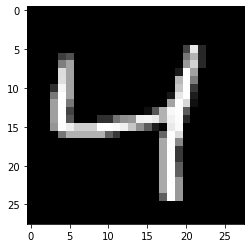

In [5]:
plt.imshow(train_data[2][0][0],cmap="gray")

# creating the model

In [6]:
def create_lenet():
    model = nn.Sequential(
        nn.Conv2d(1, 6, 5, padding=2),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5, padding=0),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Flatten(),
        nn.Linear(400, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
    )
    return model

# Validating the Model

In [7]:
def validate(model, data):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x,1)
        pred = pred.data.cpu()
        total += x.size(0)
        correct += torch.sum(pred == labels)
    return correct*100./total

# Training Function

In [8]:
def train(numb_epoch=3, lr=1e-3, device="cpu"):
    accuracies = []
    cnn = create_lenet().to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr=lr)
    max_accuracy = 0
    for epoch in range(numb_epoch):
        for i, (images, labels) in enumerate(train_dl):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(cnn, val_dl))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy
            print("Saving Best Model with Accuracy: ", accuracy)
        print('Epoch:', epoch+1, "Accuracy :", accuracy, '%')
    plt.plot(accuracies)
    return best_model

# Gpu Availability

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Training the model

Saving Best Model with Accuracy:  95.75
Epoch: 1 Accuracy : 95.75 %
Saving Best Model with Accuracy:  97.54000091552734
Epoch: 2 Accuracy : 97.54000091552734 %
Saving Best Model with Accuracy:  97.87000274658203
Epoch: 3 Accuracy : 97.87000274658203 %
Saving Best Model with Accuracy:  98.19000244140625
Epoch: 4 Accuracy : 98.19000244140625 %
Saving Best Model with Accuracy:  98.52999877929688
Epoch: 5 Accuracy : 98.52999877929688 %
Epoch: 6 Accuracy : 98.5 %
Saving Best Model with Accuracy:  98.66999816894531
Epoch: 7 Accuracy : 98.66999816894531 %
Epoch: 8 Accuracy : 98.62999725341797 %
Epoch: 9 Accuracy : 98.5999984741211 %
Epoch: 10 Accuracy : 98.66000366210938 %
Saving Best Model with Accuracy:  98.81999969482422
Epoch: 11 Accuracy : 98.81999969482422 %
Epoch: 12 Accuracy : 98.48999786376953 %
Saving Best Model with Accuracy:  98.91000366210938
Epoch: 13 Accuracy : 98.91000366210938 %
Saving Best Model with Accuracy:  98.94000244140625
Epoch: 14 Accuracy : 98.94000244140625 %
Epoch

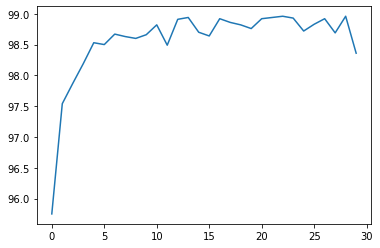

In [10]:
lenet = train(30, device=device)